Time series forecasting is a technique for the prediction of events through a sequence of time. In this lesson, we will be taking a small forecasting problem and try to solve it till the end learning time series forecasting alongside.

“Time series models are used to forecast future events based on previous events that have been observed (and data collected) at regular time intervals.”

What is Time Series analysis
 
Time series forecasting is a technique for the prediction of events through a sequence of time. The technique is used across many fields of study, from geology to behavior to economics. The techniques predict future events by analyzing the trends of the past, on the assumption that future trends will hold similar to historical trends.

Time series forecasting is performed in a variety of applications including:

Weather forecasting
Earthquake prediction
Astronomy
Statistics
Mathematical finance
Econometrics
Pattern recognition
Signal processing
Control engineering
Time series forecasting is sometimes just the analysis of experts studying a field and offering their predictions. 

There are two main goals of time series analysis: (a) identifying the nature of the phenomenon represented by the sequence of observations, and (b) forecasting (predicting future values of the time series variable). Both of these goals require that the pattern of observed time series data is identified and more or less formally described. Once the pattern is established, we can interpret and integrate it with other data (i.e., use it in our theory of the investigated phenomenon, e.g., seasonal commodity prices). Regardless of the depth of our understanding and the validity of our interpretation (theory) of the phenomenon, we can extrapolate the identified pattern to predict future events.

Stages in Time Series Forecasting
 
Solving a time series problem is a little different as compared to a regular modeling task. A simple/basic journey of solving a time series problem can be demonstrated through the following processes. We will understand about tasks which one needs to perform in every stage. We will also look at the python implementation of each stage of our problem-solving journey.

Steps are –

1. Visualizing time series

In this step, we try to visualize the series. We try to identify all the underlying patterns related to the series like trend and seasonality. Do not worry about these terms right now, as we will discuss them during implementation. You can say that this is more a type of exploratory analysis of time series data.

2. Stationarising time series

A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time. Most statistical forecasting methods are based on the assumption that the time series can be rendered approximately stationary (i.e., “stationarised”) through the use of mathematical transformations. A stationarised series is relatively easy to predict: you simply predict that its statistical properties will be the same in the future as they have been in the past! Another reason for trying to stationarise a time series is to be able to obtain meaningful sample statistics such as means, variances, and correlations with other variables. Such statistics are useful as descriptors of future behavior only if the series is stationary. For example, if the series is consistently increasing over time, the sample mean and variance will grow with the size of the sample, and they will always underestimate the mean and variance in future periods. And if the mean and variance of a series are not well-defined, then neither are its correlations with other variables.

3. Finding the best parameters for our model

We need to find optimal parameters for forecasting models one’s we have a stationary series. These parameters come from the ACF and PACF plots. Hence, this stage is more about plotting above two graphs and extracting optimal model parameters based on them. Do not worry, we will cover on how to determine these parameters during the implementation part below!

4. Fitting model

Once we have our optimal model parameters, we can fit an ARIMA model to learn the pattern of the series. Always remember that time series algorithms work on stationary data only hence making a series stationary is an important aspect

5. Predictions

After fitting our model, we will be predicting the future in this stage. Since we are now familiar with a basic flow of solving a time series problem, let us get to the implementation.

 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# Above is a special style template for matplotlib, highly useful for visualizing time series data
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7 
df = pd.read_csv('AirPassengers.csv')

In [2]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
#Now, Define column names, drop nulls, convert Date to DateTime format and make Date as an index column because it is not possible to plot the graph without index.
df=df.dropna()
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True) #set month as index
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Now, let us start with our predefined steps:

1. Visualizing the time series.

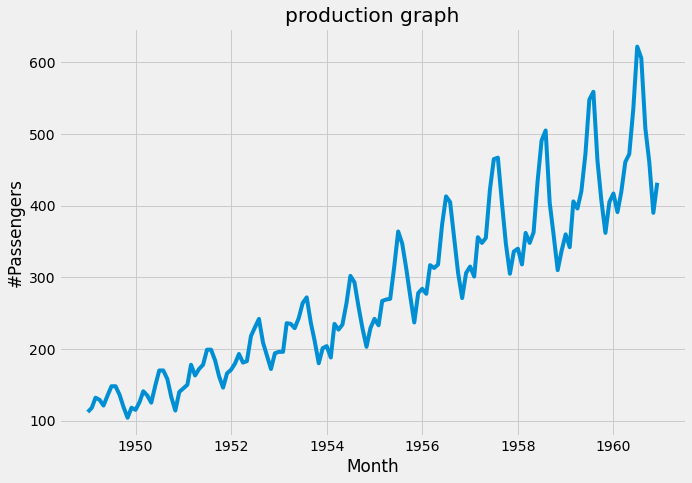

In [4]:
plt.xlabel("Month")
plt.ylabel("#Passengers")
plt.title("production graph")
plt.plot(df)

Remember that for time series forecasting, a series needs to be stationary. The series should have a constant mean, variance, and covariance.

There are few points to note here, the mean is not constant in this case as we can clearly see an upward trend.

Hence, we have identified that our series is not stationary. We need to have a stationary series to do time series forecasting. In the next stage, we will try to convert this into a stationary series.

Lets us plot the scatterplot:

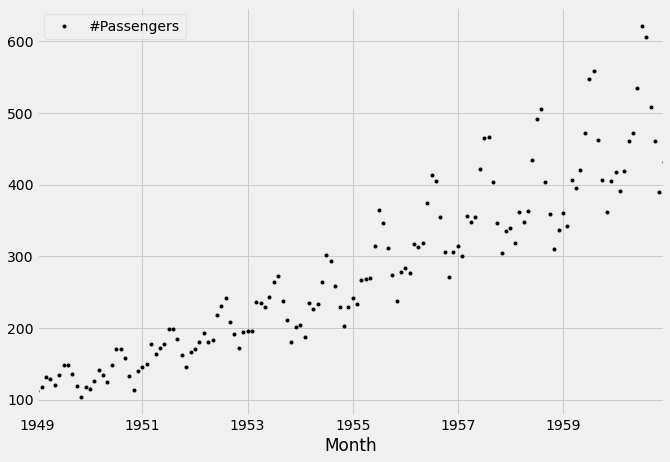

In [5]:
df.plot(style='k.')
plt.show()

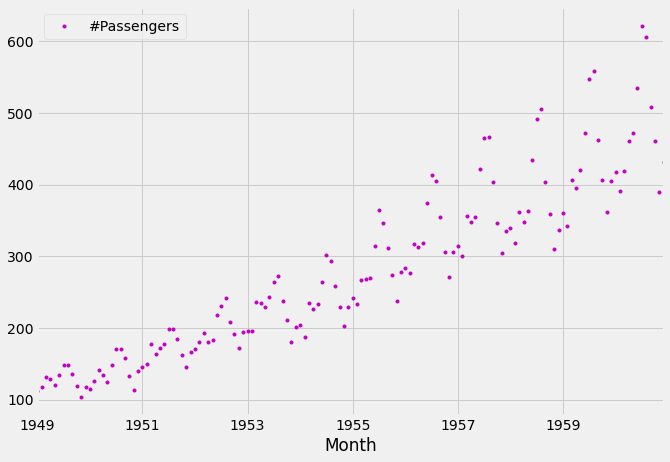

In [6]:
df.plot(style='m.')
plt.show()

We can observe a near-normal distribution(bell-curve) over consumption values.

Also, a given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise.

These components are defined as follows:

Level: The average value in the series.
Trend: The increasing or decreasing value in the series.
Seasonality: The repeating short-term cycle in the series.
Noise: The random variation in the series.
In order to perform a time series analysis, we may need to separate seasonality and trend from our series. The resultant series will become stationary through this process.

So let us separate Trend and Seasonality from the time series.

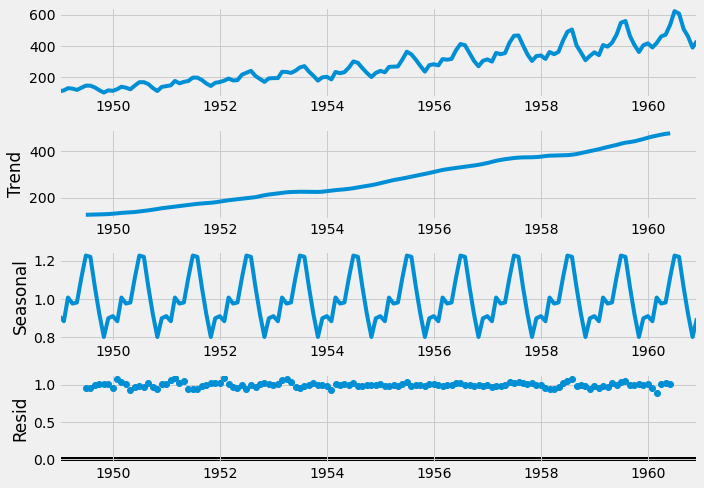

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model='multiplicative')
result.plot()
plt.show()

This gives us more insight into our data and real-world actions. Clearly, there is an upward trend and a recurring event where passenger shoots maximum every year.

In [8]:
df.columns

Index(['#Passengers'], dtype='object')

2. Stationarising the time series.

First, we need to check if a series is stationary or not.

ADF (Augmented Dickey-Fuller) Test

The Dickey-Fuller test is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not. The null and alternate hypothesis of this test is:

Null Hypothesis: The series has a unit root (value of a =1)

Alternate Hypothesis: The series has no unit root.

If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear or difference stationary (we will understand more about difference stationary in the next section).

If both mean and standard deviation are flat lines(constant mean and constant variance), the series becomes stationary.

The following function is one that can plot a series with its rolling mean and standard deviation.

In [11]:
#1, 2, 4, 6, 7 = 7 +4 + 6 + 7  1+2+4+6+7


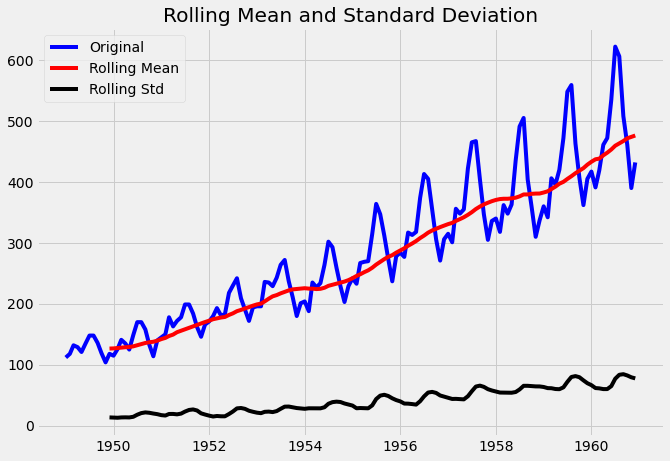

Results of dickey fuller test
Test Statistics                  0.815369
p-value                          0.991880
No. of lags used                13.000000
Number of observations used    130.000000
critical value (1%)             -3.481682
critical value (5%)             -2.884042
critical value (10%)            -2.578770
dtype: float64


In [9]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    #perform dickey fuller test  
    print("Results of dickey fuller test")
    adft = adfuller(timeseries['#Passengers'],autolag='AIC') 
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df)

We see that the p-value is greater than 0.05 so we cannot reject the Null hypothesis. Also, the test statistics is greater than the critical values. so the data is non-stationary.

To get a stationary series, we need to eliminate the trend and seasonality from the series.

we start by taking a log of the series to reduce the magnitude of the values and reduce the rising trend in the series. Then after getting the log of the series, we find the rolling average of the series. A rolling average is calculated by taking input for the past 12 records and giving a mean passenger value at every point further ahead in series.

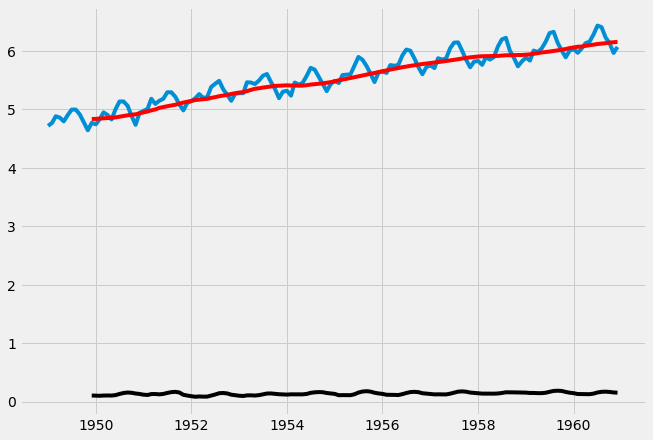

In [10]:
df_log = np.log(df) #log of the passenger 
moving_avg = df_log.rolling(12).mean() #mean 12months for a year 
std_dev = df_log.rolling(12).std() #std dev 
plt.plot(df_log)
plt.plot(moving_avg, color="red")
plt.plot(std_dev, color ="black")
plt.show()

After finding the mean, we take the difference of the series and the mean at every point in the series.

This way, we eliminate trends out of a series and obtain a more stationary series.

In [11]:
df_log_moving_avg_diff = df_log-moving_avg
df_log_moving_avg_diff.dropna(inplace=True)

Perform the Dickey-Fuller test (ADFT) once again. We have to perform this function every time to check whether the data is stationary or not.

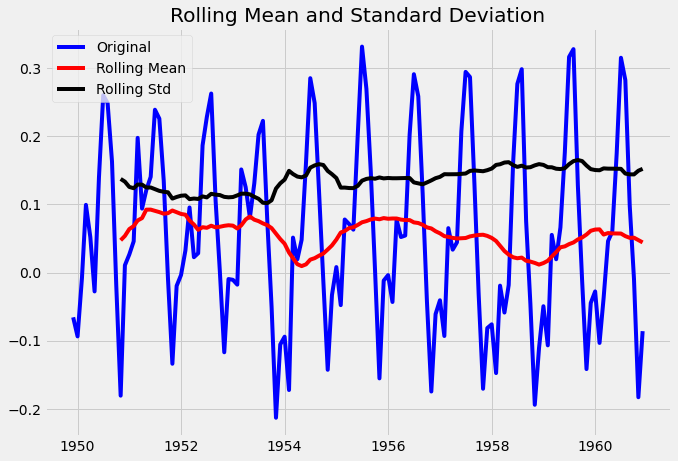

Results of dickey fuller test
Test Statistics                 -3.162908
p-value                          0.022235
No. of lags used                13.000000
Number of observations used    119.000000
critical value (1%)             -3.486535
critical value (5%)             -2.886151
critical value (10%)            -2.579896
dtype: float64


In [12]:
test_stationarity(df_log_moving_avg_diff)

From the above graph, we observed that the data attained stationarity.

One of the modules is completed as we came to a conclusion. We need to check the weighted average, to understand the trend of the data in time series. Take the previous log data and to perform the following operation.

In [13]:
weighted_average = df_log.ewm(halflife=12, min_periods=0,adjust=True).mean()  #exponential weighted functions, to know the trend in the TS

The exponential moving average (EMA) is a weighted average of the last n prices, where the weighting decreases exponentially with each previous price/period. In other words, the formula gives recent prices more weight than past prices.

Previously we subtracted df_log with moving average, now take the same df_log and subtract with weighted_average and perform the Dickey-Fuller test (ADFT) once again.

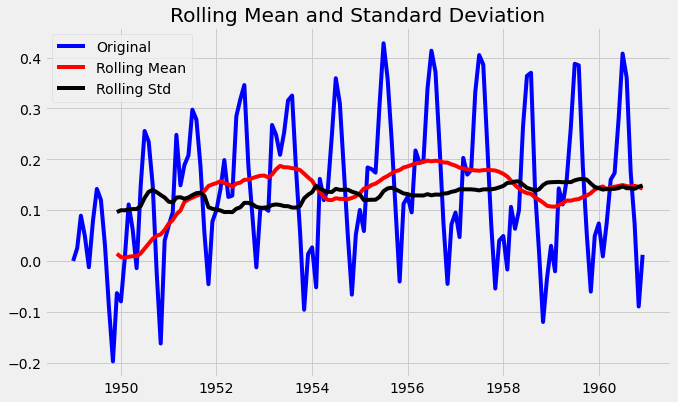

Results of dickey fuller test
Test Statistics                 -3.601262
p-value                          0.005737
No. of lags used                13.000000
Number of observations used    130.000000
critical value (1%)             -3.481682
critical value (5%)             -2.884042
critical value (10%)            -2.578770
dtype: float64


In [14]:
logScale_weightedMean = df_log-weighted_average
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
test_stationarity(logScale_weightedMean)

From the above graph, we observed that the data attained stationarity. We also see that the test statistics and critical value is relatively equal.

There can be cases when there is a high seasonality in the data.

In those cases, just removing the trend will not help much. We need to also take care of the seasonality in the series. One such method for this task is differencing.

Differencing is a method of transforming a time series dataset.

It can be used to remove the series dependence on time, so-called temporal dependence. This includes structures like trends and seasonality. Differencing can help stabilize the mean of the time series by removing changes in the level of a time series, and so eliminating (or reducing) trend and seasonality.

Differencing is performed by subtracting the previous observation from the current observation.
Perform the Dickey-Fuller test (ADFT) once again.

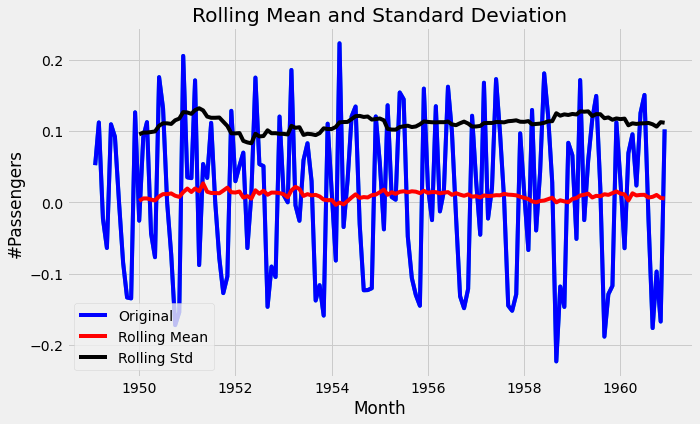

Results of dickey fuller test
Test Statistics                 -2.717131
p-value                          0.071121
No. of lags used                14.000000
Number of observations used    128.000000
critical value (1%)             -3.482501
critical value (5%)             -2.884398
critical value (10%)            -2.578960
dtype: float64


In [15]:
df_log_diff = df_log - df_log.shift()
plt.title("Shifted timeseries")
plt.xlabel("Month")
plt.ylabel("#Passengers")
plt.plot(df_log_diff)#Let us test the stationarity of our resultant series
df_log_diff.dropna(inplace=True)
test_stationarity(df_log_diff)

The next step is to perform decomposition which provides a structured way of thinking about a time series forecasting problem, both generally in terms of modeling complexity and specifically in terms of how to best capture each of these components in a given model. Finally, perform the Dickey-Fuller test (ADFT) once again.

In [20]:
from chart_studio.plotly import plot_mpl

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_log, model='additive', freq = 12)

result.plot()

plt.show()

trend = result.trend

trend.dropna(inplace=True)

seasonality = result.seasonal

seasonality.dropna(inplace=True)

residual = result.resid

residual.dropna(inplace=True)

test_stationarity(residual)

ModuleNotFoundError: No module named 'chart_studio'

After the decomposition, if we look at the residual then we have clearly a flat line for both mean and standard deviation. We have got our stationary series and now we can move to find the best parameters for our model.

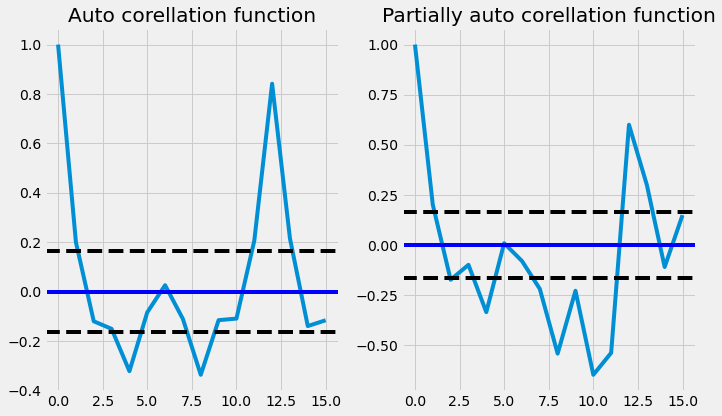

In [16]:
from statsmodels.tsa.stattools import acf,pacf
# we use d value here(data_log_shift)
acf = acf(df_log_diff, nlags=15)
pacf= pacf(df_log_diff, nlags=15,method='ols')#plot PACF for P ordinary least squared method
plt.subplot(121)
plt.plot(acf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')

plt.title('Auto corellation function')
plt.tight_layout()#plot ACF for Q
plt.subplot(122)
plt.plot(pacf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.title('Partially auto corellation function')
plt.tight_layout()

4. Fitting model

In order to find the p and q values from the above graphs, we need to check, where the graph cuts off the origin or drops to zero for the first time from the above graphs the p and q values are merely close to 3 where the graph cuts off the origin ( draw the line to x-axis) now we have p,d,q values. So now we can substitute in the ARIMA model and let's see the output.

C:\Users\OLADEJI TOLUWANI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\OLADEJI TOLUWANI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


RSS : 1.029152


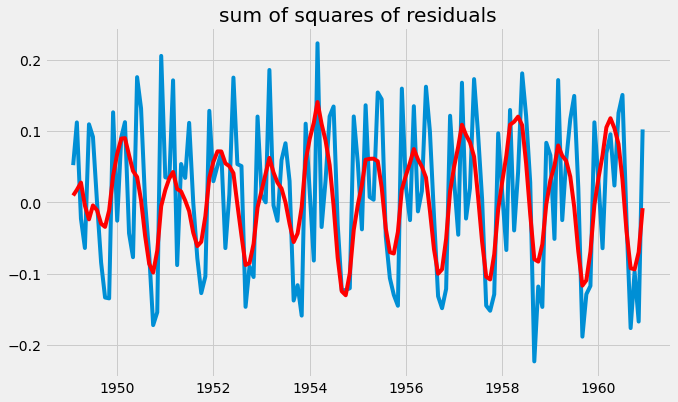

In [24]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_log, order=(2,1,2))
result_AR = model.fit(disp = 0)
plt.plot(df_log_diff)
plt.plot(result_AR.fittedvalues, color='red')
plt.title("sum of squares of residuals")
print('RSS : %f' %sum((result_AR.fittedvalues-df_log_diff["#Passengers"])**2))

Less the RSS value, the more effective the model is. You check with (2,1,0),(3,1,1), etc to look for the smallest values of RSS.

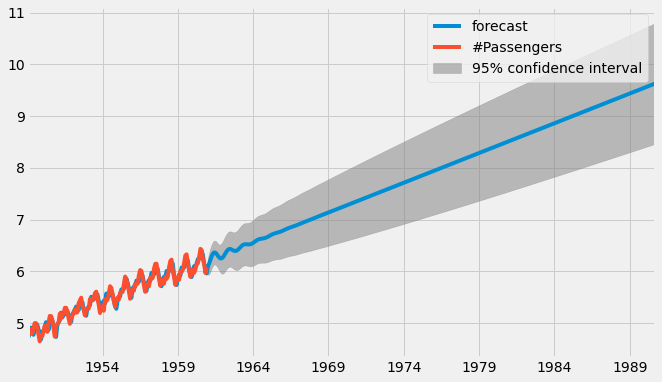

In [25]:
result_AR.plot_predict(1,500)
x=result_AR.forecast(steps=200)

From the above graph, we calculated the future predictions till 1989 the greyed out area is the confidence interval that means the predictions will not cross that area.

Conclusion
 
Finally, we were able to build an ARIMA model and actually forecast for a future time period. Keep note that this is a basic implementation to get one started with time series forecasting. There are a lot of concepts like smoothening etc and models like ARIMAX, prophet, etc to build your time series models.

Well, that’s all for this article hope you guys have enjoyed reading this it, feel free to share your comments/thoughts/feedback in the comment section.